# **Transfer Learning with pre-trained model as Feature Extractor**

# Apply Transfer Learning

Load MobileNet ans use it as feature extractor with pre-trained CNN weights.

Load Cats and dogs images and use it for Transfer Learning.

Make sure you have the following data file in the current folder: **cat_dog_sub.rar**

It contains 1000 cats + 1000 dogs training images.
Plus, 1000 cats + 1000 dogs test images.

On unarchiving this file, it will create the following directory structures iinside a folder named **cat_dog_sub**:

**cat_dog_sub/train/cat** [containing 1000 cats images]

**cat_dog_sub/train/dog** [containing 1000 dogs images]

**cat_dog_sub/test/cat**  [containing 1000 cats images]

**cat_dog_sub/test/dog**  [containing 1000 dogs images]









In [2]:
ls

sample_data/


In [12]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

#from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model


## Load the Pre-trained MobileNet Model

### Let's check the Original MobileNet Model

In [13]:
original_model = MobileNet(weights='imagenet')
original_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [14]:
# Take the pre-trained model
# We don't need the last layer of the model - the softmax layer with 1000 outputs
base_model = MobileNet(weights='imagenet', include_top=False)

17235968/17225924 [==============================] - 2s 0us/step


In [15]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                         

# Now, you can extract features and train a conventional ML model to perform the downstream classification task.

In [ ]:
## Use for Feature Extraction

In [221]:
from tensorflow.keras.models import Model
mobnet = MobileNet(weights='imagenet')
flattened_vectors = mobnet.layers[-3].output
feature_extractor_model = Model(inputs=mobnet.input, outputs=flattened_vectors)
#mobnet.summary()
#feature_extractor_model.summary()

In [ ]:
'''
x_train = feature_extractor_model.predict(X_train)
print(x_train.shape)
x_test = feature_extractor_model.predict(X_test)
print(x_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
confusion_matrix(y_test, pred)

'''

# Now, repurpose the model for solving a Binary classification Task
## Tune the Model as per Our Requirements

In [16]:
# 2-class classification - cat vs. dog
CLASSES = 2

# Take the output from the model
# Note that the base model has a Convolutional Layer as the Last Layer
x = base_model.output

# Apply pooling
x = GlobalAveragePooling2D(name='avg_pool')(x)

# Apply regularization
x = Dropout(0.4)(x)

# Add the output layer with Softmax activation for 2-class classification
predictions = Dense(CLASSES, activation='softmax')(x)

# Set the final input and output of the model
model = Model(inputs=base_model.input, outputs=predictions)

### Freeze all the previous layers of the loaded Model

In [17]:
for layer in base_model.layers:
    layer.trainable = False

### Compile the Model with Suitable Parameters

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

In [20]:
#Uncomment and run this cell if RAR utility is not already installed in your colab platform
#!sudo apt-get install unrar

In [207]:
# Extract files from the archive/RAR file
#!unrar x cat_dog_sub.rar

In [22]:
import os
os.listdir('cat_dog_sub/cat_dog_sub')


['train', 'test']

In [51]:
cd ..


/content


In [126]:
num_images=2000


import glob
import numpy as np
import pathlib
import cv2

image_path="./cat_dog_sub/cat_dog_sub/*/*/*"
files = glob.glob(image_path, recursive=True)
print(len(files))

#labels = []
#file_name= []
#file_path= []
#category_type=[]

train_idx=0
test_idx=0
train_images = np.empty(shape=(num_images, 224, 224, 3), dtype="uint8")
test_images = np.empty(shape=(num_images, 224, 224, 3), dtype="uint8")
train_labels = np.empty(shape=(num_images, 1), dtype="int")
test_labels = np.empty(shape=(num_images, 1), dtype="int")

for name in files:
    #print(name)
    #file_name.append(os.path.basename(os.path.normpath(name)))
    #file_path.append(os.path.normpath(name))
    #category_type.append(str(os.path.normpath(name)).split("/")[-3])
    #path = pathlib.PurePath(name)
    #labels.append(path.parent.name)
    #print()

    path = pathlib.PurePath(name)
    category = str(os.path.normpath(name)).split("/")[-3]
    lab = path.parent.name
    #print(path)
    #print(category)
    #print(lab)
    file_path="./"+str(path)
    #print(file_path)      
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image = cv2.resize(image, (224,224))

    if (category=="train"):
              train_images[train_idx,:,:,:] = image
              if lab=="cat":
                train_labels[train_idx] = 0
              else:
                train_labels[train_idx] = 1
              train_idx = train_idx + 1  

    if (category=="test"):
              test_images[test_idx,:,:,:] = image
              if lab=="cat":
                test_labels[test_idx] = 0
              else:
                test_labels[test_idx] = 1
              test_idx = test_idx + 1
              

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

#print(labels)
#print()
#print(file_name)
#print()
#print(file_path)
#print()
#print(category_type)



4000
(2000, 224, 224, 3)
(2000, 224, 224, 3)
(2000, 1)
(2000, 1)


In [140]:
#file_path

In [139]:
#cd ./cat_dog_sub/cat_dog_sub/test/cat

In [124]:
#cp 10824.jpg 936.jpg


In [138]:
#cd /content

In [127]:
train_labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [128]:
shuffler1 = np.random.permutation(len(train_labels))
X_train = train_images[shuffler1]
y_train = train_labels[shuffler1]

shuffler2 = np.random.permutation(len(test_labels))
X_test = test_images[shuffler2]
y_test = test_labels[shuffler2]


In [133]:
#X_test.shape
#y_train

In [134]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)


### Read Data from the Designated Folders

## Train the Model

In [137]:
model.fit(X_train, Y_train,
    epochs=15, validation_data=[X_test, Y_test])

Epoch 1/15
63/63 [==============================] - 20s 163ms/step - loss: 0.8119 - accuracy: 0.5280 - val_loss: 0.6539 - val_accuracy: 0.6130
Epoch 2/15
63/63 [==============================] - 9s 145ms/step - loss: 0.6832 - accuracy: 0.6525 - val_loss: 0.5731 - val_accuracy: 0.7245
Epoch 3/15
63/63 [==============================] - 9s 145ms/step - loss: 0.6103 - accuracy: 0.7050 - val_loss: 0.5466 - val_accuracy: 0.7305
Epoch 4/15
63/63 [==============================] - 9s 145ms/step - loss: 0.5854 - accuracy: 0.7060 - val_loss: 0.5274 - val_accuracy: 0.7460
Epoch 5/15
63/63 [==============================] - 10s 157ms/step - loss: 0.5556 - accuracy: 0.7245 - val_loss: 0.5119 - val_accuracy: 0.7635
Epoch 6/15
63/63 [==============================] - 9s 144ms/step - loss: 0.5473 - accuracy: 0.7320 - val_loss: 0.5043 - val_accuracy: 0.7665
Epoch 7/15
63/63 [==============================] - 9s 144ms/step - loss: 0.5291 - accuracy: 0.7450 - val_loss: 0.5062 - val_accuracy: 0.7555
Epoc

## Prediction of the Model

In [142]:
from tensorflow.keras.preprocessing import image

In [202]:
#img = image.load_img(r'cat_dog_sub/cat_dog_sub/test/dog/182.jpg', target_size=(299,299))
#img = image.load_img(r'cat_dog_sub/cat_dog_sub/test/dog/105.jpg', target_size=(299,299))
#img = image.load_img(r'cat_dog_sub/cat_dog_sub/test/dog/10145.jpg', target_size=(299,299))

#img = image.load_img(r'cat_dog_sub/cat_dog_sub/test/cat/1006.jpg', target_size=(299,299))
img = image.load_img(r'cat_dog_sub/cat_dog_sub/test/cat/4158.jpg', target_size=(299,299))


In [203]:
from tensorflow.keras.applications.mobilenet import preprocess_input

x = image.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)

In [204]:
pred = model.predict(x)[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


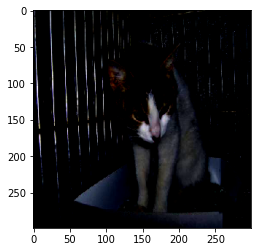

In [205]:
import matplotlib.pyplot as plt
plt.imshow(x[0,:,:,:])

In [206]:
pred

array([1.0000000e+00, 6.6881958e-09], dtype=float32)

In [207]:
np.argmax(pred, axis=0)

0